# Data Analytics Internship at TECHNOHACKS EDUTECH

# Name - Manoj Patil

Task 1 - : Perform Data Cleaning

Clean a dataset by removing missing values and outliers


In [1]:
# Importing Required Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from warnings import filterwarnings
filterwarnings(action='ignore')

In [2]:
# Loading data set 

data=pd.read_csv("TechnoTask1 train.csv")

In [3]:
data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
data.shape

(891, 12)

In [6]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
data.isna().sum()

# Age Cabin and Embarked contains Null values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Data Cleaning 

In [9]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [10]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Age Cabin and Embarked contains Null values

In [11]:
int(data["Age"].mean())

29

In [12]:
# Replacing Null value with Mean because Age column is numerical 

data["Age"]=data["Age"].fillna(np.mean(data["Age"]))

In [13]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
# Replacing Null value with Mode because Embarked column is Categorical 

data["Embarked"].mode()


0    S
Name: Embarked, dtype: object

In [15]:
data["Embarked"].fillna(data["Embarked"].mode()[0], inplace=True)

In [16]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [17]:
data["Cabin"].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [18]:
data["Cabin"].mode()

0        B96 B98
1    C23 C25 C27
2             G6
Name: Cabin, dtype: object

In [19]:
#  Replacing Null value with Mode because Cabin column is Categorical 

data["Cabin"].fillna(data["Cabin"].mode()[0], inplace=True)

In [20]:
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [21]:
data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.033207,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,0.033207,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.057527,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


# Checking For Outliers 

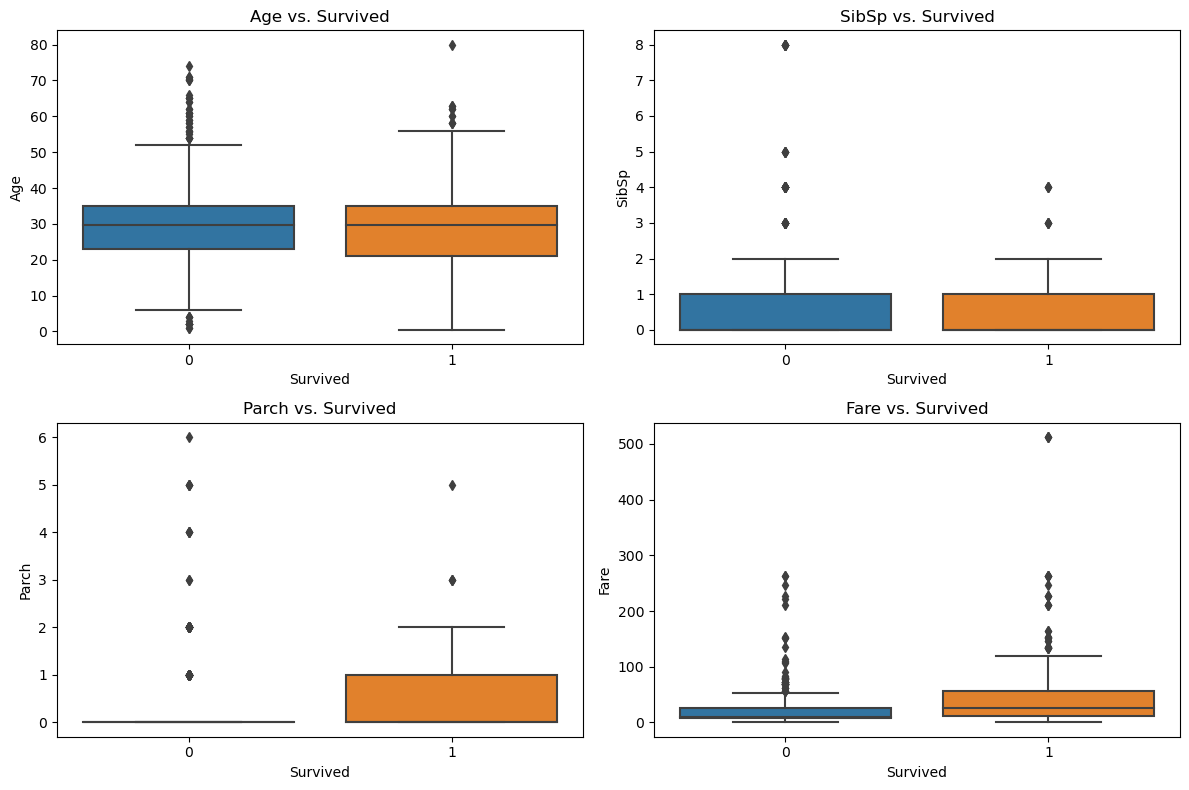

In [22]:
# Create subplots for each numerical column
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Add labels to the x and y axes of each subplot
sns.boxplot(data=data, x='Survived', y='Age', ax=axs[0, 0])
axs[0, 0].set_title('Age vs. Survived')

sns.boxplot(data=data, x='Survived', y='SibSp', ax=axs[0, 1])
axs[0, 1].set_title('SibSp vs. Survived')

sns.boxplot(data=data, x='Survived', y='Parch', ax=axs[1, 0])
axs[1, 0].set_title('Parch vs. Survived')

sns.boxplot(data=data, x='Survived', y='Fare', ax=axs[1, 1])
axs[1, 1].set_title('Fare vs. Survived')

plt.tight_layout()
plt.show()


In [23]:
Q1 = data['Fare'].quantile(0.25)
Q3 = data['Fare'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = data[(data['Fare'] < lower_bound) | (data['Fare'] > upper_bound)]

print(outliers)


     PassengerId  Survived  Pclass  \
1              2         1       1   
27            28         0       1   
31            32         1       1   
34            35         0       1   
52            53         1       1   
..           ...       ...     ...   
846          847         0       3   
849          850         1       1   
856          857         1       1   
863          864         0       3   
879          880         1       1   

                                                  Name     Sex        Age  \
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.000000   
27                      Fortune, Mr. Charles Alexander    male  19.000000   
31      Spencer, Mrs. William Augustus (Marie Eugenie)  female  29.699118   
34                             Meyer, Mr. Edgar Joseph    male  28.000000   
52            Harper, Mrs. Henry Sleeper (Myna Haxtun)  female  49.000000   
..                                                 ...     ...        ...   
846 

In [24]:
filtered_data = data[(data['Fare'] >= lower_bound) & (data['Fare'] <= upper_bound)]


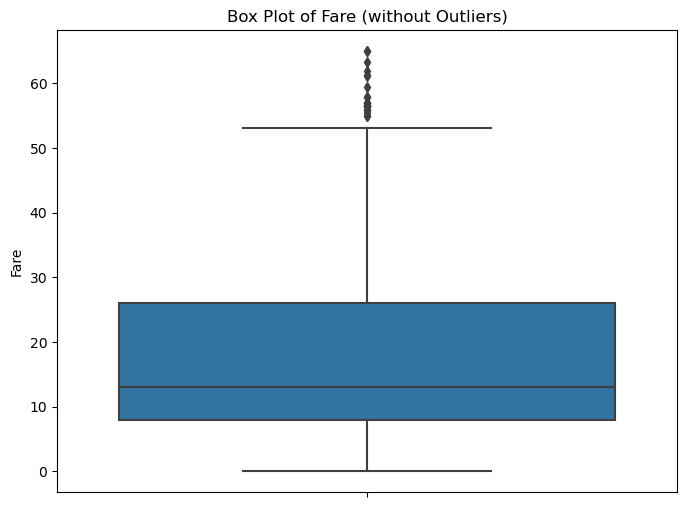

In [25]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=filtered_data, y='Fare')
plt.title('Box Plot of Fare (without Outliers)')
plt.ylabel('Fare')
plt.show()


In [26]:
# Calculate the bounds for outlier removal
Q1 = data['Fare'].quantile(0.25)
Q3 = data['Fare'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers and create a new DataFrame without them
filtered_data = data[(data['Fare'] >= lower_bound) & (data['Fare'] <= upper_bound)]

# Display the shape before and after removing outliers
print("Original dataset shape:", data.shape)
print("Dataset shape after removing outliers:", filtered_data.shape)


Original dataset shape: (891, 12)
Dataset shape after removing outliers: (775, 12)


In [27]:
# Calculate the bounds for outlier removal for each numerical column
columns_to_check = ['Age', 'SibSp','Parch', 'Fare',]  # Add other columns as needed

filtered_data = data.copy()  # Create a copy of the original data to work with

for column in columns_to_check:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Remove outliers from the specific column
    filtered_data = filtered_data[(filtered_data[column] >= lower_bound) & (filtered_data[column] <= upper_bound)]

# Display the shape before and after removing outliers
print("Original dataset shape:", data.shape)
print("Dataset shape after removing outliers:", filtered_data.shape)


Original dataset shape: (891, 12)
Dataset shape after removing outliers: (577, 12)


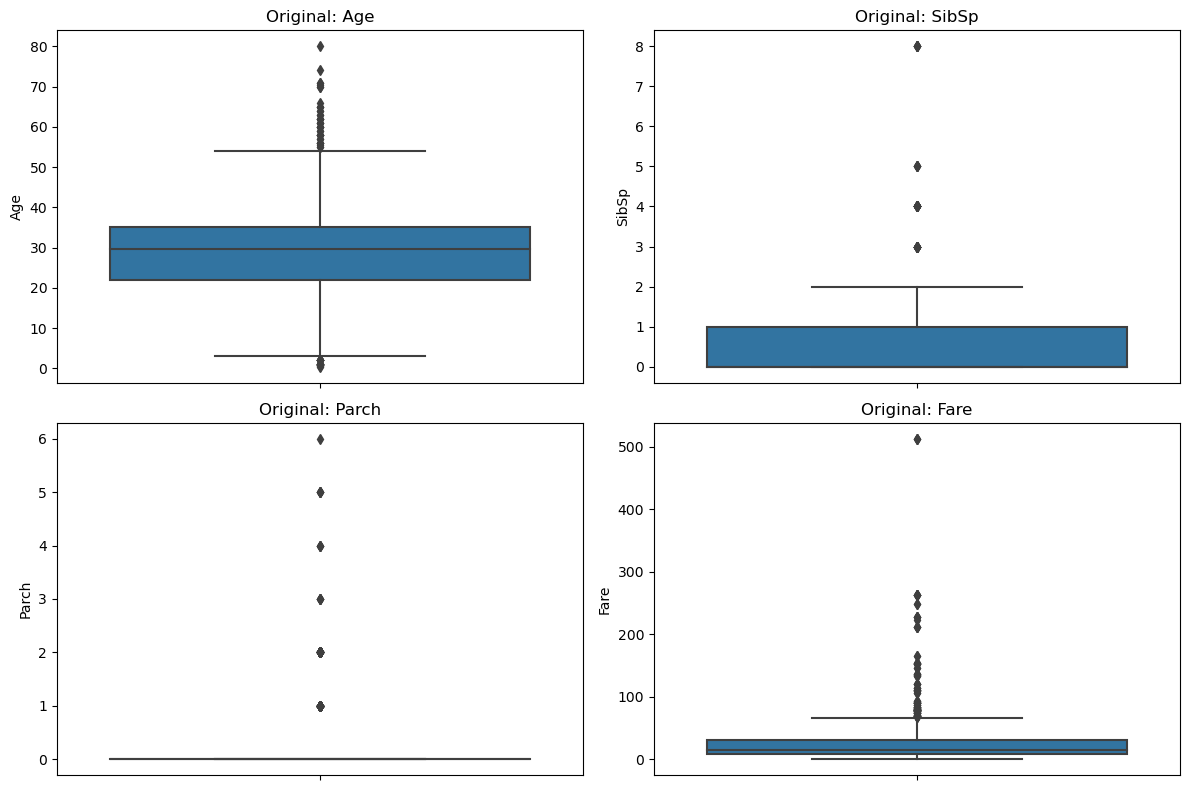

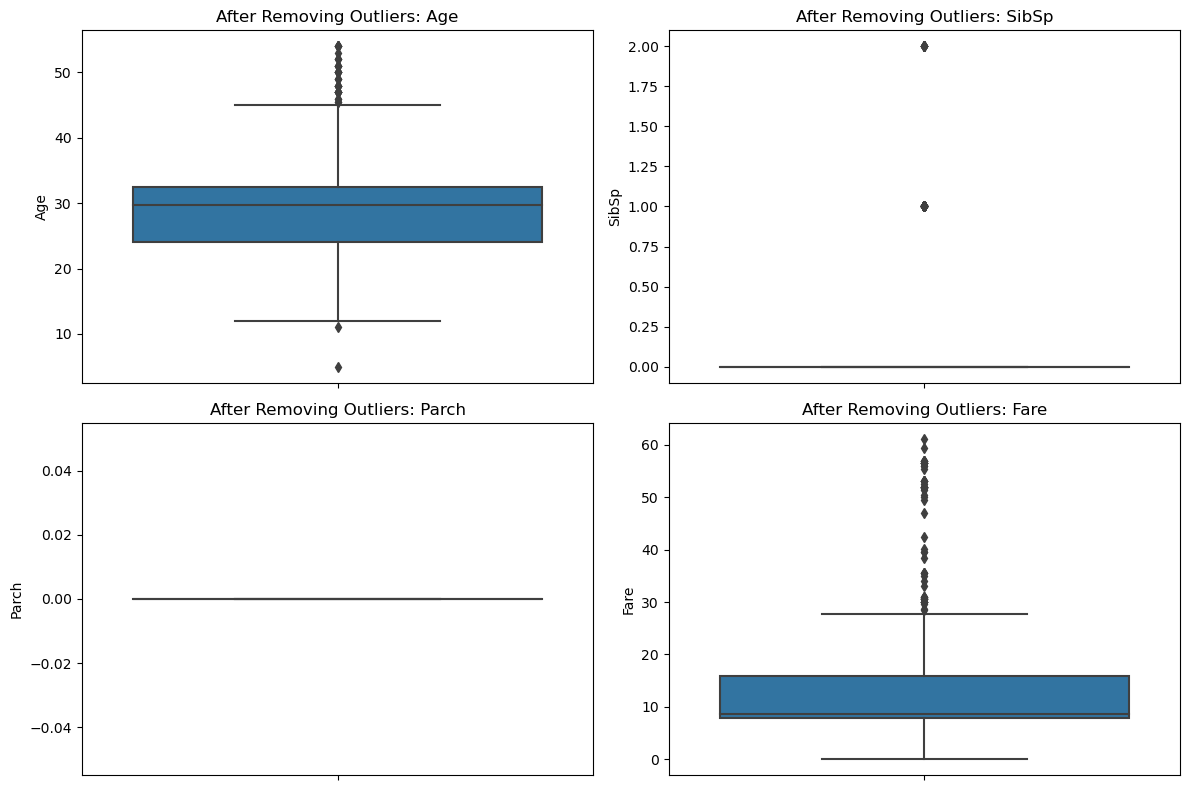

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns



# Calculate the bounds for outlier removal for each numerical column
columns_to_check = ['Age', 'SibSp', 'Parch', 'Fare']  




# Create subplots for box plots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))


for idx, column in enumerate(columns_to_check):
    # Original box plot
    sns.boxplot(data=data, y=column, ax=axs[idx // 2, idx % 2])
    axs[idx // 2, idx % 2].set_title(f'Original: {column}')
    axs[idx // 2, idx % 2].set_ylabel(column)

plt.tight_layout()
plt.show()



# Create subplots for box plots after removing outliers
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

for idx, column in enumerate(columns_to_check):
    
    # Box plot after removing outliers
    sns.boxplot(data=filtered_data, y=column, ax=axs[idx // 2, idx % 2])
    axs[idx // 2, idx % 2].set_title(f'After Removing Outliers: {column}')
    axs[idx // 2, idx % 2].set_ylabel(column)

plt.tight_layout()
plt.show()


# Performing EDA

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

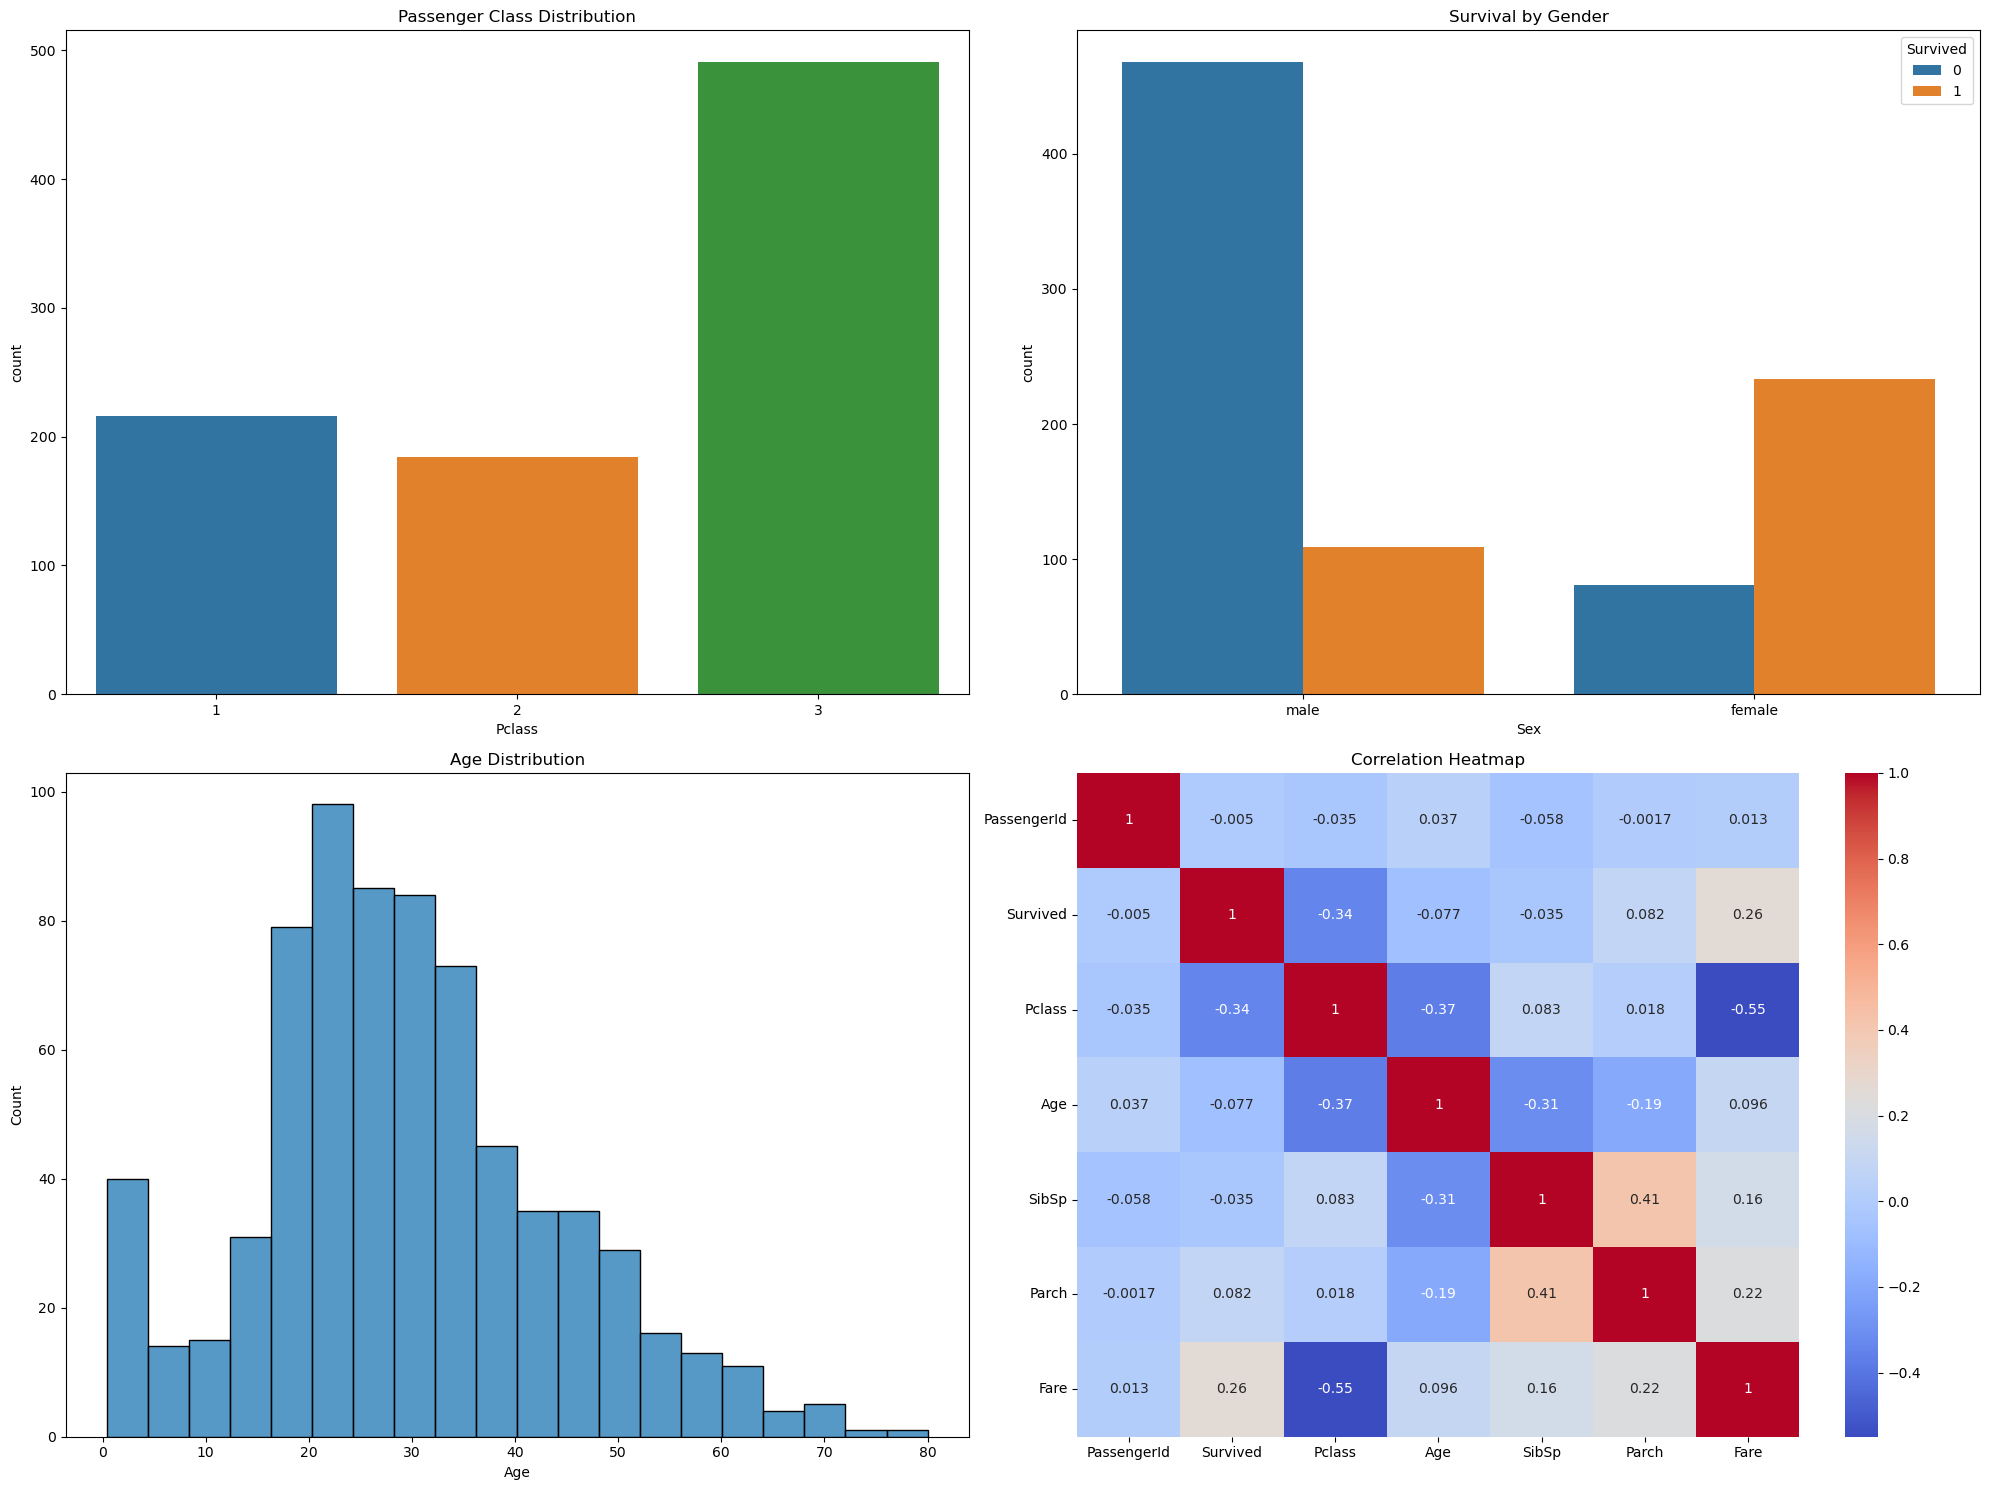

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('TechnoTask1 train.csv')  

# Display basic information about the dataset
print(data.info())

# Summary statistics of numerical columns
print(data.describe())

# Set up a figure with subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 15))
fig.subplots_adjust(hspace=0.5)

# Passenger Class Distribution
sns.countplot(data=data, x='Pclass', ax=axes[0, 0])
axes[0, 0].set_title('Passenger Class Distribution')

# Survival by Gender
sns.countplot(data=data, x='Sex', hue='Survived', ax=axes[0, 1])
axes[0, 1].set_title('Survival by Gender')

# Age Distribution
sns.histplot(data=data, x='Age', bins=20, ax=axes[1, 0])
axes[1, 0].set_title('Age Distribution')

# Correlation Heatmap
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', ax=axes[1, 1])
axes[1, 1].set_title('Correlation Heatmap')

plt.tight_layout()
plt.show()
